## Libraries

In [11]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

### Labs for work

* pip install geopy
* pip install ipywidgets
* pip install jupyterlab
* pip install nodejs
* pip install geojson
* pip install keplergl
* pip install h3
* pip install -U --pre h3
* pip install pydeck


In [12]:
tracks=pd.read_csv('tracks_v4.csv',index_col=None,sep=',')

In [13]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2716777 entries, 0 to 2716776
Data columns (total 34 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0.1           int64  
 1   Unnamed: 0             int64  
 2   id                     int64  
 3   start_dttm             object 
 4   end_dttm               object 
 5   centroid_wkt           object 
 6   centroid_lon           float64
 7   centroid_lat           float64
 8   start_dttm_day         int64  
 9   h3_9                   object 
 10  age                    float64
 11  car_owners             int64  
 12  carsharing_user        int64  
 13  not_citizen_rf         int64  
 14  gender                 int64  
 15  healthy_food_inter     int64  
 16  income                 float64
 17  public_trnsprt_user    int64  
 18  pharmacies_inter       int64  
 19  beauty_salon_inter     int64  
 20  elite_sports_inter     int64  
 21  sprtswr_ftwr_inter     int64  
 22  sprt_good_inter   

In [14]:
from datetime import datetime

In [15]:
tracks['start_dttm']=list(map(str,tracks['start_dttm']))

In [16]:
tracks=tracks[tracks['start_dttm']!='nan']

In [17]:
tracks['start_dttm']=list(map(lambda x:datetime.strptime(x, '%Y-%m-%d %H:%M:%S'),tracks['start_dttm']))
tracks['end_dttm']=list(map(lambda x:datetime.strptime(x, '%Y-%m-%d %H:%M:%S'),tracks['end_dttm']))

In [18]:
tracks['time_spent']=list(map(lambda x,y:(x-y).total_seconds()/60,tracks['end_dttm'],tracks['start_dttm']))
tracks

,Unnamed: 0.1,Unnamed: 0,id,start_dttm,end_dttm,centroid_wkt,centroid_lon,centroid_lat,start_dttm_day,h3_9,...,sprt_fit_inter,hunting_fishing_inter,fashion_inter,coffee_inter,med_serv_inter,education_inter,delivery_inter,markets_inter,no_children,time_spent
0,0,0,687194767538,2023-03-11 01:38:35,2023-03-11 09:38:35,POINT (30.508818 59.975328),30.508818,59.975328,11,89110604d0fffff,...,0,0,0,0,0,0,0,0,1,480.000000
1,1,1,687194767538,2023-03-10 23:38:35,2023-03-11 01:38:35,POINT (30.508818 59.975328),30.508818,59.975328,11,89110604d0fffff,...,0,0,0,0,0,0,0,0,1,120.000000
2,2,2,687194767538,2023-03-11 15:57:02,2023-03-11 17:54:41,POINT (30.508818 59.975328),30.508818,59.975328,11,89110604d0fffff,...,0,0,0,0,0,0,0,0,1,117.650000
3,3,3,687194767538,2023-03-11 13:57:02,2023-03-11 15:57:02,POINT (30.508818 59.975328),30.508818,59.975328,11,89110604d0fffff,...,0,0,0,0,0,0,0,0,1,120.000000
4,4,4,687194767538,2023-03-11 20:56:27,2023-03-11 22:56:27,POINT (30.508818 59.975328),30.508818,59.975328,11,89110604d0fffff,...,0,0,0,0,0,0,0,0,1,120.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2716772,2716772,2716772,522,2023-03-05 21:29:20,2023-03-06 16:21:01,POINT (30.220448 59.832785),30.220448,59.832785,6,89110615243ffff,...,0,0,0,0,0,0,0,0,1,1131.683333
2716773,2716773,2716773,522,2023-03-04 02:33:54,2023-03-04 12:20:49,POINT (30.220215 59.832280),30.220215,59.832280,4,89110615243ffff,...,0,0,0,0,0,0,0,0,1,586.916667
2716774,2716774,2716774,522,2023-03-04 15:03:36,2023-03-04 19:45:37,POINT (30.220215 59.832280),30.220215,59.832280,4,89110615243ffff,...,0,0,0,0,0,0,0,0,1,282.016667
2716775,2716775,2716775,522,2023-03-03 18:31:52,2023-03-04 02:33:54,POINT (30.219517 59.830764),30.219517,59.830764,4,8911061524bffff,...,0,0,0,0,0,0,0,0,1,482.033333


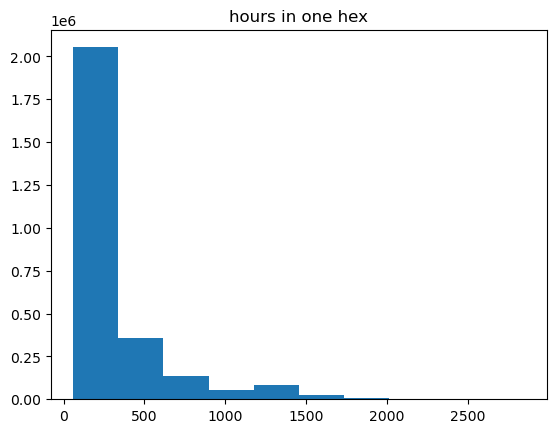

2848.516666666667  hours= 1.9781365740740742  days


In [19]:
plt.hist(tracks.time_spent)
plt.title('hours in one hex')
plt.show()
print(max(tracks.time_spent),' hours=',max(tracks.time_spent)/24/60,' days')

Нет инфы с некорректными старт и энд дейт

In [20]:
tracks[tracks['time_spent']<0]

,Unnamed: 0.1,Unnamed: 0,id,start_dttm,end_dttm,centroid_wkt,centroid_lon,centroid_lat,start_dttm_day,h3_9,...,sprt_fit_inter,hunting_fishing_inter,fashion_inter,coffee_inter,med_serv_inter,education_inter,delivery_inter,markets_inter,no_children,time_spent


In [21]:
tracks=tracks[tracks['time_spent']>=0]
tracks=tracks[tracks['start_dttm']<=datetime.strptime('01.08.2023 00:00', '%d.%m.%Y %H:%M')]

In [22]:
min(tracks['start_dttm'])

Timestamp('2023-03-02 00:00:19')

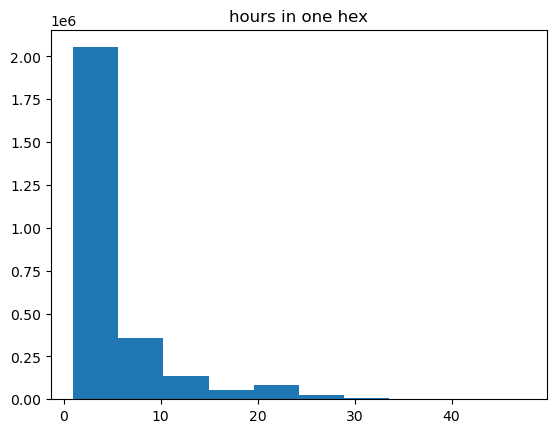

47.475277777777784  hours= 1.9781365740740742  days


In [23]:
plt.hist(tracks.time_spent/60)
plt.title('hours in one hex')
plt.show()
print(max(tracks.time_spent/60),' hours=',max(tracks.time_spent)/24/60,' days')

In [24]:
np.min(tracks['time_spent']) #внутри одного гексогона минимум 1 час

60.0

In [25]:
time_average=pd.pivot_table(tracks,index=('id','h3_9'),values='time_spent',aggfunc='mean').reset_index()
time_average

,id,h3_9,time_spent
0,0,89110604c47ffff,94.066667
1,0,891106a9817ffff,155.795946
2,0,891106a9873ffff,109.741667
3,0,891106a987bffff,122.640278
4,0,891106a98a3ffff,91.800000
...,...,...,...
410447,773094113323,89110606447ffff,572.857692
410448,773094113323,89110606463ffff,84.650000
410449,773094113323,89110606477ffff,60.000000
410450,773094113323,8911060647bffff,73.033333


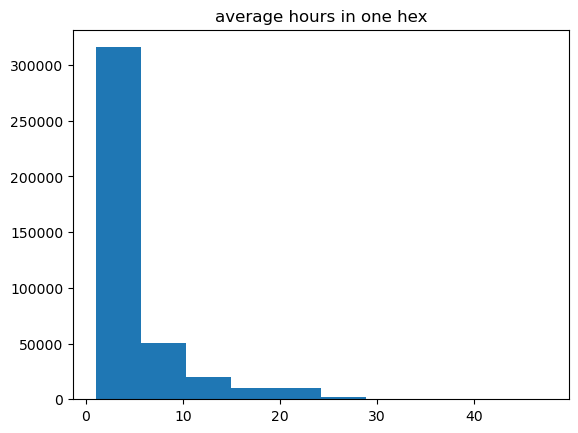

47.475277777777784  hours= 1.9781365740740742  days


In [26]:
plt.hist(time_average.time_spent/60)
plt.title('average hours in one hex')
plt.show()
print(max(time_average.time_spent/60),' hours=',max(time_average.time_spent)/24/60,' days')

In [27]:
time_average['count']=1
number_of_hex_per_id=pd.pivot_table(time_average,index='id',values='count',aggfunc=sum).reset_index()
number_of_hex_per_id

,id,count
0,0,6
1,1,2
2,2,7
3,3,4
4,4,5
...,...,...
41258,773094113317,1
41259,773094113320,1
41260,773094113321,4
41261,773094113322,6


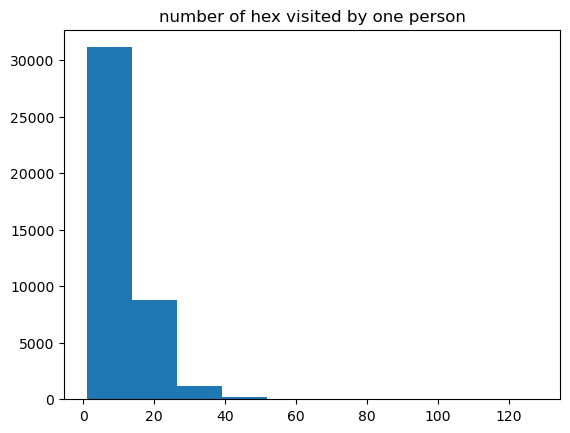

In [28]:
plt.hist(number_of_hex_per_id['count'])
plt.title('number of hex visited by one person')
plt.show()


In [29]:

number_of_hex_per_id.columns=['id','hex per one person']
number_of_hex_per_id.sort_values('hex per one person').head(-10)


,id,hex per one person
31061,575525618231,1
33230,618475290968,1
33220,618475290953,1
33217,618475290949,1
9204,171798691929,1
...,...,...
4948,85899346467,60
23312,438086664304,60
2051,34359738634,61
19492,360777253310,61


In [43]:
import keplergl
import base64

map1 = keplergl.KeplerGl(height=400, data={"data_1": tracks[tracks['id']==0][['id','h3_9','time_spent']]})
orig_html = str(map1._repr_html_(),'utf-8')
b64d_html = base64.b64encode(orig_html.encode('utf-8')).decode('utf-8')
framed_html = f'<iframe src="data:text/html;base64,{b64d_html}" style="width:95%; height: 600px">'
import IPython
IPython.display.HTML(framed_html)


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [44]:
import h3
path = h3.grid_path_cells(tracks[tracks['id']==0]['h3_9'].values[0], tracks[tracks['id']==0]['h3_9'].values[1])
import pydeck
df = pd.DataFrame(data=dict(h3=path))

layer = pydeck.Layer(
    "H3HexagonLayer",
    df,
    pickable=True,
    stroked=True,
    filled=True,
    extruded=False,
    get_hexagon="h3",
    get_line_color=[255, 255, 255],
    line_width_min_pixels=1,
)
view_state = pydeck.ViewState(latitude=59.9311, longitude=30.3609, zoom=14)
r = pydeck.Deck(layers=[layer], initial_view_state=view_state)
r

{
  "initialViewState": {
    "latitude": 59.9311,
    "longitude": 30.3609,
    "zoom": 14
  },
  "layers": [
    {
      "@@type": "H3HexagonLayer",
      "data": [
        {
          "h3": "891106a992bffff"
        }
      ],
      "extruded": false,
      "filled": true,
      "getHexagon": "@@=h3",
      "getLineColor": [
        255,
        255,
        255
      ],
      "id": "a50eca98-9dd7-4d17-ae07-c657e125687a",
      "lineWidthMinPixels": 1,
      "pickable": true,
      "stroked": true
    }
  ],
  "mapProvider": "carto",
  "mapStyle": "https://basemaps.cartocdn.com/gl/dark-matter-gl-style/style.json",
  "views": [
    {
      "@@type": "MapView",
      "controller": true
    }
  ]
}

In [30]:
from datetime import datetime
tracks['current_date']=list(map(lambda x:pd.to_datetime(x).date(),tracks['start_dttm']))

In [31]:
tracks['count']=1
pd.pivot_table(tracks,index=('current_date'),values='count',aggfunc=sum).reset_index()

,current_date,count
0,2023-03-02,30788
1,2023-03-03,143673
2,2023-03-04,154108
3,2023-03-05,154182
4,2023-03-06,155726
5,2023-03-07,154915
6,2023-03-08,153056
7,2023-03-09,145443
8,2023-03-10,144108
9,2023-03-11,155056


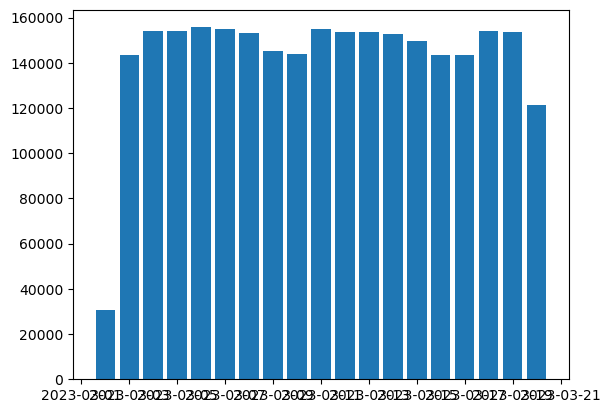

In [32]:
dates=pd.pivot_table(tracks,index=('current_date'),values='count',aggfunc=sum).reset_index()
plt.bar(dates['current_date'],dates['count'])
plt.show()

In [48]:
map1 = keplergl.KeplerGl(height=400, data={"data_1":hex[hex['age_20']!=0][['h3_9', 'age_20']],'data_2':hex[hex['age_20_30']!=0][['h3_9', 'age_20_30']]})
orig_html = str(map1._repr_html_(),'utf-8')
b64d_html = base64.b64encode(orig_html.encode('utf-8')).decode('utf-8')
framed_html = f'<iframe src="data:text/html;base64,{b64d_html}" style="width:95%; height: 600px">'
import IPython
IPython.display.HTML(framed_html)


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


Просто полезные команды

import h3
lat, lng = 37.769377, -122.388903
resolution = 9
h3.cell_to_latlng('89110607627ffff')

import h3
lat, lng = 59.743442,30.615682, 
resolution = 9
h3.latlng_to_cell(lat, lng, resolution)

### Как я получила новые границы для пребывания в гексогоне 

test_full=pd.DataFrame(columns=['index', 'Unnamed: 0.1', 'Unnamed: 0', 'id', 'start_dttm_x',
       'end_dttm_x', 'centroid_wkt', 'centroid_lon', 'centroid_lat',
       'start_dttm_day', 'h3_9', 'time_spent', 'hex per one person',
       'current_date', 'count', 'end_dttm_diff1', 'time_spent_bt_events',
       'hex_diff1', 'hex_diff1_check', 'counter', 'end_dttm_y',
       'start_dttm_y'])

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from IPython.display import clear_output

num=1
for ids in np.unique(tracks['id'])[num:]:
    test1=tracks[tracks['id']==ids]
    for h3_9 in np.unique(test1['h3_9']):
        test=test1[test1['h3_9']==h3_9]
        test=test.reset_index()
        test['end_dttm_diff1']=0
        zero=[0]
        zero=zero+list(test['end_dttm'])[:-1]
        test['end_dttm_diff1']=zero
        test['time_spent_bt_events']=list(map(lambda x,y:(x-y).total_seconds()/60 if y!=0 else 1,test['start_dttm'],test['end_dttm_diff1']))
        counter=[1]
        i=1
        for index in range(1,len(test)):
            if test.loc[index,'time_spent_bt_events']>0:
                i+=1
            counter.append(i)
        test['counter']=counter
        test=pd.merge(test,pd.pivot_table(test,index='counter',values=('start_dttm','end_dttm'),aggfunc={'start_dttm':min, 'end_dttm':max}),how='left',on='counter')
        test_full=test_full.append(test)
    print(num/len(np.unique(tracks['id'])))
    num+=1
    clear_output(wait=True)
    

In [33]:
tracks=tracks.sort_values(by=['id','start_dttm'])
tracks['end_dttm_diff1']=[0]+list(tracks['end_dttm'])[:-1]
tracks['time_spent_bt_events']=list(map(lambda x,y:(x-y).total_seconds()/60 if y!=0 else 1,tracks['start_dttm'],tracks['end_dttm_diff1']))
tracks=tracks.reset_index()


In [34]:
tracks[tracks['id']==1]

,index,Unnamed: 0.1,Unnamed: 0,id,start_dttm,end_dttm,centroid_wkt,centroid_lon,centroid_lat,start_dttm_day,...,med_serv_inter,education_inter,delivery_inter,markets_inter,no_children,time_spent,current_date,count,end_dttm_diff1,time_spent_bt_events
116,1771790,1771790,1771790,1,2023-03-02 21:50:29,2023-03-03 17:50:49,POINT (30.071302 59.722014),30.071302,59.722014,3,...,0,0,0,0,1,1200.333333,2023-03-02,1,2023-03-20 18:44:47,-25734.300000
117,1771806,1771806,1771806,1,2023-03-03 17:50:49,2023-03-04 12:34:14,POINT (30.071302 59.722014),30.071302,59.722014,4,...,0,0,0,0,1,1123.416667,2023-03-03,1,2023-03-03 17:50:49,0.000000
118,1771808,1771808,1771808,1,2023-03-04 12:34:14,2023-03-04 16:36:44,POINT (30.017781 59.706751),30.017781,59.706751,4,...,0,0,0,0,1,242.500000,2023-03-04,1,2023-03-04 12:34:14,0.000000
119,1771807,1771807,1771807,1,2023-03-04 16:36:44,2023-03-04 19:53:44,POINT (30.071302 59.722014),30.071302,59.722014,4,...,0,0,0,0,1,197.000000,2023-03-04,1,2023-03-04 16:36:44,0.000000
120,1771796,1771796,1771796,1,2023-03-04 19:53:44,2023-03-05 15:54:13,POINT (30.071302 59.722014),30.071302,59.722014,5,...,0,0,0,0,1,1200.483333,2023-03-04,1,2023-03-04 19:53:44,0.000000
121,1771801,1771801,1771801,1,2023-03-05 15:54:13,2023-03-06 11:54:16,POINT (30.017781 59.706751),30.017781,59.706751,6,...,0,0,0,0,1,1200.050000,2023-03-05,1,2023-03-05 15:54:13,0.000000
122,1771802,1771802,1771802,1,2023-03-06 11:54:16,2023-03-06 14:31:34,POINT (30.071302 59.722014),30.071302,59.722014,6,...,0,0,0,0,1,157.300000,2023-03-06,1,2023-03-06 11:54:16,0.000000
123,1771797,1771797,1771797,1,2023-03-06 14:31:34,2023-03-07 10:37:10,POINT (30.071302 59.722014),30.071302,59.722014,7,...,0,0,0,0,1,1205.600000,2023-03-06,1,2023-03-06 14:31:34,0.000000
124,1771809,1771809,1771809,1,2023-03-07 12:20:38,2023-03-08 08:22:41,POINT (30.071302 59.722014),30.071302,59.722014,8,...,0,0,0,0,1,1202.050000,2023-03-07,1,2023-03-07 10:37:10,103.466667
125,1771811,1771811,1771811,1,2023-03-08 08:22:41,2023-03-08 12:53:23,POINT (30.017781 59.706751),30.017781,59.706751,8,...,0,0,0,0,1,270.700000,2023-03-08,1,2023-03-08 08:22:41,0.000000


In [35]:
def complex_check(ids,id1,idm1,tsbe,tsbe1,hexs,hex1,hexm1):
    if hexs==hex1 and ids==id1 and tsbe1==0 and (ids!=idm1 or hexs!=hexm1 or tsbe!=0):
        return 's'
    elif ids==id1 and ids==idm1 and hexs==hexm1 and hexs==hex1 and tsbe==0 and tsbe1==0:
        return 'c'
    elif ids==idm1 and hexs==hexm1 and tsbe==0 and (ids!=id1 or hexs!=hex1 or tsbe1!=0):
        return 'e'
    else:
        return 'n'
    

In [36]:
tracks['id1']=list(tracks['id'])[1:]+[0]
tracks['idm1']=[0]+list(tracks['id'])[:-1]
tracks['tsbe1']=list(tracks['time_spent_bt_events'])[1:]+[0]
tracks['hex1']=list(tracks['h3_9'])[1:]+[0]
tracks['hexm1']=[0]+list(tracks['h3_9'])[:-1]

In [37]:
tracks['complex_check']=list(map(complex_check,
                                 tracks['id'],
                                 tracks['id1'],
                                 tracks['idm1'],
                                 tracks['time_spent_bt_events'],
                                 tracks['tsbe1'],
                                 tracks['h3_9'],
                                 tracks['hex1'],
                                 tracks['hexm1']))
                        

In [38]:
tracks_ready=tracks[tracks['complex_check']=='n']

In [39]:
tracks_correct=tracks[tracks['complex_check']!='n']
tracks_correct=tracks_correct[tracks_correct['complex_check']!='c']
tracks_correct['start_dttm_diffm1']=[0]+list(tracks_correct['start_dttm'])[:-1]
tracks_correct=tracks_correct[tracks_correct['complex_check']=='e']
tracks_correct['start_dttm']=tracks_correct['start_dttm_diffm1']
del tracks_correct['start_dttm_diffm1']

tracks_ready=tracks_ready.append(tracks_correct)
tracks_ready=tracks_ready.sort_values(by=['id','start_dttm'])
tracks_ready

/tmp/ipykernel_802/4030785071.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tracks_ready=tracks_ready.append(tracks_correct)


,index,Unnamed: 0.1,Unnamed: 0,id,start_dttm,end_dttm,centroid_wkt,centroid_lon,centroid_lat,start_dttm_day,...,current_date,count,end_dttm_diff1,time_spent_bt_events,id1,idm1,tsbe1,hex1,hexm1,complex_check
2,1015113,1015113,1015113,0,2023-03-03 00:18:43,2023-03-03 11:44:19,POINT (30.404122 60.031678),30.404122,60.031678,3,...,2023-03-03,1,2023-03-03 10:01:13,0.000000,0,0,93.233333,891106a9817ffff,891106a9817ffff,e
3,1015114,1015114,1015114,0,2023-03-03 13:17:33,2023-03-03 14:59:41,POINT (30.404122 60.031678),30.404122,60.031678,3,...,2023-03-03,1,2023-03-03 11:44:19,93.233333,0,0,268.433333,891106a9817ffff,891106a9817ffff,n
4,1015111,1015111,1015111,0,2023-03-03 19:28:07,2023-03-03 21:57:15,POINT (30.404122 60.031678),30.404122,60.031678,3,...,2023-03-03,1,2023-03-03 14:59:41,268.433333,0,0,102.583333,891106a9817ffff,891106a9817ffff,n
5,1015132,1015132,1015132,0,2023-03-03 23:39:50,2023-03-04 05:35:30,POINT (30.404122 60.031678),30.404122,60.031678,4,...,2023-03-03,1,2023-03-03 21:57:15,102.583333,0,0,0.000000,891106a9d4bffff,891106a9817ffff,n
6,1015131,1015131,1015131,0,2023-03-04 05:35:30,2023-03-04 08:35:30,POINT (30.397536 60.036734),30.397536,60.036734,4,...,2023-03-04,1,2023-03-04 05:35:30,0.000000,0,0,75.933333,891106a987bffff,891106a9817ffff,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2716767,1980835,1980835,1980835,773094113323,2023-03-19 10:54:46,2023-03-19 13:29:38,POINT (30.346307 59.906929),30.346307,59.906929,19,...,2023-03-19,1,2023-03-19 10:06:03,48.716667,773094113323,773094113323,51.600000,891106075a3ffff,89110606447ffff,n
2716769,1980837,1980837,1980837,773094113323,2023-03-19 14:21:14,2023-03-19 16:59:35,POINT (30.346307 59.906929),30.346307,59.906929,19,...,2023-03-19,1,2023-03-19 15:51:19,0.000000,773094113323,773094113323,30.316667,891106075a3ffff,891106075a3ffff,e
2716774,1980833,1980833,1980833,773094113323,2023-03-19 17:29:54,2023-03-19 22:47:19,POINT (30.346307 59.906929),30.346307,59.906929,19,...,2023-03-19,1,2023-03-19 21:29:54,0.000000,773094113323,773094113323,60.166667,89110606447ffff,891106075a3ffff,e
2716775,1980858,1980858,1980858,773094113323,2023-03-19 23:47:29,2023-03-20 10:18:15,POINT (30.318499 59.931031),30.318499,59.931031,20,...,2023-03-19,1,2023-03-19 22:47:19,60.166667,773094113323,773094113323,40.200000,891106075a3ffff,891106075a3ffff,n


In [40]:
tracks_ready.shape

(2012677, 46)

Посчитаю расстояния

In [41]:
#(lat, lon) - посчитать расстояния
def find_dist1(lat1,lon1,lat2,lon2):
    try:
        lat1=lat1/57.36049
        lat2=lat2/57.36049
        lon1=lon1/57.36049
        lon2=lon2/57.36049
        return 2*6371*np.arcsin((np.sin((lat2-lat1)/2)**2+np.cos(lat1)*np.cos(lat2)*np.sin((lon1-lon2)/2)**2)**0.5)

    except ValueError:
        return 0

In [42]:
tracks_ready['centroid_lon1']=[0]+list(tracks_ready['centroid_lon'])[:-1]
tracks_ready['centroid_lat1']=[0]+list(tracks_ready['centroid_lat'])[:-1]
tracks_ready['distance']=list(map(find_dist1,tracks_ready['centroid_lat'],tracks_ready['centroid_lon'],tracks_ready['centroid_lat1'],tracks_ready['centroid_lon1']))

In [43]:
tracks_ready['id1']=list(tracks_ready['id'])[1:]+[0]
tracks_ready['idm1']=[0]+list(tracks_ready['id'])[:-1]
tracks_ready['distance']=list(map(lambda d,idm1,ids: d if idm1==ids else 0,tracks_ready['distance'],tracks_ready['idm1'],tracks_ready['id']))
tracks_ready.sort_values('distance')

,index,Unnamed: 0.1,Unnamed: 0,id,start_dttm,end_dttm,centroid_wkt,centroid_lon,centroid_lat,start_dttm_day,...,time_spent_bt_events,id1,idm1,tsbe1,hex1,hexm1,complex_check,centroid_lon1,centroid_lat1,distance
2384995,710500,710500,710500,678604832929,2023-03-02 23:46:59,2023-03-03 13:04:26,POINT (30.483637 60.268102),30.483637,60.268102,3,...,0.000000,678604832929,678604832928,65.516667,891100db477ffff,891100db477ffff,e,30.471135,59.879169,0.000000
1847985,2070350,2070350,2070350,523986010432,2023-03-05 11:24:17,2023-03-05 18:01:45,POINT (30.361450 59.916850),30.361450,59.916850,5,...,0.333333,523986010432,523986010432,106.266667,8911060f6bbffff,89110606213ffff,n,30.361450,59.916850,0.000000
878884,2074732,2074732,2074732,249108103402,2023-03-14 05:21:27,2023-03-14 08:08:16,POINT (29.429956 60.171631),29.429956,60.171631,14,...,0.000000,249108103402,249108103402,45.333333,8911044ae3bffff,89110458e9bffff,e,29.429956,60.171631,0.000000
2595014,2487366,2487366,2487366,738734374956,2023-03-02 13:56:15,2023-03-03 10:51:10,POINT (31.346754 58.002429),31.346754,58.002429,3,...,-26472.933333,738734374956,738734374955,0.000000,89111099d23ffff,8911060dd97ffff,n,30.631006,59.799453,0.000000
2595013,1387710,1387710,1387710,738734374955,2023-03-20 22:05:01,2023-03-20 23:09:11,POINT (30.631006 59.799453),30.631006,59.799453,20,...,35.866667,738734374956,738734374955,-26472.933333,89111098e7bffff,8911060dd97ffff,n,30.631006,59.799453,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60609,555721,555721,555721,17179869191,2023-03-15 08:21:31,2023-03-15 13:18:45,POINT (37.415770 55.981540),37.415770,55.981540,15,...,0.000000,17179869191,17179869191,26.533333,8911aa75203ffff,892e888dd07ffff,n,142.725579,46.886507,6644.897558
996117,1982476,1982476,1982476,283467841702,2023-03-14 19:11:31,2023-03-14 21:01:27,POINT (37.415604 55.966863),37.415604,55.966863,14,...,27.650000,283467841702,283467841702,66.516667,891106a9917ffff,892e888dd07ffff,n,142.725579,46.886507,6645.956926
1725085,2184482,2184482,2184482,489626272094,2023-03-03 13:18:56,2023-03-03 18:24:55,POINT (37.415769 55.981539),37.415769,55.981539,3,...,0.000000,489626272094,489626272094,144.766667,8911aa0d407ffff,8916160412fffff,n,158.425053,53.168002,6746.596653
114239,560394,560394,560394,25769804212,2023-03-05 00:44:46,2023-03-05 10:01:17,POINT (158.507706 52.919914),158.507706,52.919914,5,...,0.000000,25769804212,25769804212,8.933333,89161674dc7ffff,89161674dc7ffff,e,37.413761,55.981539,6772.713234


Код как адреса подтянуть

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="http")
big_diff_dist=tracks_f[tracks_f['distances between events']>200]
big_diff_dist=big_diff_dist.reset_index()
#address=address.reset_index()
for index in range(0,len(big_diff_dist)):
    big_diff_dist.iloc[index:index+1,-1:]=geolocator.reverse(str(big_diff_dist['centroid_lat'][index])+','+str(big_diff_dist['centroid_lon'][index])).address
    print(index/len(big_diff_dist))
    clear_output(wait=True)

In [46]:
tracks_ready=tracks_ready[['id', 'start_dttm', 'end_dttm',
       'centroid_wkt', 'centroid_lon', 'centroid_lat', 'start_dttm_day',
       'h3_9', 'age', 'car_owners', 'carsharing_user', 'not_citizen_rf',
       'gender', 'healthy_food_inter', 'income', 'public_trnsprt_user',
       'pharmacies_inter', 'beauty_salon_inter', 'elite_sports_inter',
       'sprtswr_ftwr_inter', 'sprt_good_inter', 'trvl_rus', 'trvl_abrd',
       'sprt_fit_inter', 'hunting_fishing_inter', 'fashion_inter',
       'coffee_inter', 'med_serv_inter', 'education_inter', 'delivery_inter',
       'markets_inter', 'no_children', 'time_spent', 'current_date', 'count',
       'end_dttm_diff1', 'time_spent_bt_events', 'id1', 'idm1', 'tsbe1',
       'hex1', 'hexm1', 'complex_check', 'centroid_lon1', 'centroid_lat1',
       'distance']]

In [47]:
tracks_ready['current_date']=list(map(lambda x:pd.to_datetime(x).date(),tracks_ready['start_dttm']))


/tmp/ipykernel_802/1790594510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks_ready['current_date']=list(map(lambda x:pd.to_datetime(x).date(),tracks_ready['start_dttm']))


In [48]:
tracks_ready['end_dttm_diff1']=[0]+list(tracks_ready['end_dttm'])[:-1]
tracks_ready['time_spent_bt_events']=list(map(lambda x,y:(x-y).total_seconds()/60 if y!=0 else 1,tracks_ready['start_dttm'],tracks_ready['end_dttm_diff1']))
tracks_ready['time_spent_bt_events']=list(map(lambda d,idm1,ids: d if idm1==ids else 0,tracks_ready['time_spent_bt_events'],tracks_ready['idm1'],tracks_ready['id']))

/tmp/ipykernel_802/1261150162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks_ready['end_dttm_diff1']=[0]+list(tracks_ready['end_dttm'])[:-1]
/tmp/ipykernel_802/1261150162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks_ready['time_spent_bt_events']=list(map(lambda x,y:(x-y).total_seconds()/60 if y!=0 else 1,tracks_ready['start_dttm'],tracks_ready['end_dttm_diff1']))
/tmp/ipykernel_802/1261150162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [49]:
tracks_ready['time_spent']=list(map(lambda x,y:(x-y).total_seconds()/60,tracks_ready['end_dttm'],tracks_ready['start_dttm']))


/tmp/ipykernel_802/3523303985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks_ready['time_spent']=list(map(lambda x,y:(x-y).total_seconds()/60,tracks_ready['end_dttm'],tracks_ready['start_dttm']))


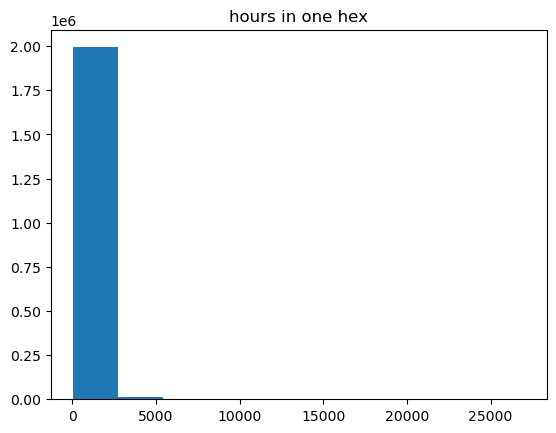

27008.366666666665  hours= 18.755810185185183  days
372.1182606465586  hours= 0.25841545878233235  days


In [50]:
plt.hist(tracks_ready.time_spent)
plt.title('hours in one hex')
plt.show()
print(max(tracks_ready.time_spent),' hours=',max(tracks_ready.time_spent)/24/60,' days')
print(np.mean(tracks_ready.time_spent),' hours=',np.mean(tracks_ready.time_spent)/24/60,' days')

In [51]:
np.min(tracks_ready.time_spent)

60.0

In [52]:
tracks_ready['speed']=tracks_ready['distance']/(tracks_ready['time_spent_bt_events']/60)

/tmp/ipykernel_802/1934383355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks_ready['speed']=tracks_ready['distance']/(tracks_ready['time_spent_bt_events']/60)


In [53]:
tracks_ready.columns

Index(['id', 'start_dttm', 'end_dttm', 'centroid_wkt', 'centroid_lon',
       'centroid_lat', 'start_dttm_day', 'h3_9', 'age', 'car_owners',
       'carsharing_user', 'not_citizen_rf', 'gender', 'healthy_food_inter',
       'income', 'public_trnsprt_user', 'pharmacies_inter',
       'beauty_salon_inter', 'elite_sports_inter', 'sprtswr_ftwr_inter',
       'sprt_good_inter', 'trvl_rus', 'trvl_abrd', 'sprt_fit_inter',
       'hunting_fishing_inter', 'fashion_inter', 'coffee_inter',
       'med_serv_inter', 'education_inter', 'delivery_inter', 'markets_inter',
       'no_children', 'time_spent', 'current_date', 'count', 'end_dttm_diff1',
       'time_spent_bt_events', 'id1', 'idm1', 'tsbe1', 'hex1', 'hexm1',
       'complex_check', 'centroid_lon1', 'centroid_lat1', 'distance', 'speed'],
      dtype='object')

# Тут работаем с пропусками


че делаем - для каждого id находим самый популярный по времени проведения (в сумме где больше всего времени проводит) гекс. Для каждого гекса находим средние значения для каждой из переменных, которые хотим заполнить. Не округляю бинарные переменные - будем интерпретировать как вероятность того, что человек принадлежит к какой-то группе (н-р, вероятность, что человек использует машину 2% или 100%, если есть инфо в самом файле) Соединяем типовые описания для каждого гекса с id по самым популярным гексам, далее проверяем, есть ли данные ля id по это переменной и если нет - заполняем новым значением. Далее это дело запихиваем в основной датасет. Если человек где-то проводит одинаковое количество максимального времени, оставляю случайный гекс 


In [62]:
#самые популярные гексы
tracks_ready['count']=1
hex_pivot=pd.pivot_table(tracks_ready,index=('id','h3_9'),values='time_spent',aggfunc=sum).reset_index()
hex_pivot2=pd.pivot_table(hex_pivot,index='id',values='time_spent',aggfunc=max).reset_index()
hex_pivot2['max_time_spending']='max_time_spending'
hex_pivot=pd.merge(hex_pivot,hex_pivot2[['id','max_time_spending','time_spent']],on=('id','time_spent'),how='left')
hex_pivot=hex_pivot[hex_pivot['max_time_spending']=='max_time_spending'][['id','h3_9']]



/tmp/ipykernel_802/1893444568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks_ready['count']=1


In [63]:
hex_pivot=hex_pivot.drop_duplicates(subset='id')

Сделаю внуренний анализ по гексам (можно конечно использовать файл hex, но я лично так и не получила ответа, как он был сформирован и из каких данных так что спасибо сами все сами).Важно! Для вытаскивания данных здесь я использую оргинальный датасет, так как в новом я не следила за сохранением данных по другим переменным.  

In [64]:
hexdf=pd.DataFrame(tracks['h3_9'].drop_duplicates())


In [65]:
columns_to_fill_list=['h3_9', 'age', 'car_owners',
       'carsharing_user', 'not_citizen_rf', 'gender', 'healthy_food_inter',
       'income', 'public_trnsprt_user', 'pharmacies_inter',
       'beauty_salon_inter', 'elite_sports_inter', 'sprtswr_ftwr_inter',
       'sprt_good_inter', 'trvl_rus', 'trvl_abrd', 'sprt_fit_inter',
       'hunting_fishing_inter', 'fashion_inter', 'coffee_inter',
       'med_serv_inter', 'education_inter', 'delivery_inter', 'markets_inter',
       'no_children']

In [66]:
columns_to_fill=tracks[columns_to_fill_list]
columns_to_fill=columns_to_fill.replace(np.nan,-1)
for cl in columns_to_fill.columns[1:]:
    df=pd.pivot_table(columns_to_fill[columns_to_fill[cl]>=0],index='h3_9',values=cl,aggfunc=np.mean)
    hexdf=pd.merge(hexdf,df,how='left',on='h3_9')
    hexdf[cl]=hexdf[cl].replace(np.nan,columns_to_fill[columns_to_fill[cl]>=0][cl].mean())


In [67]:
iddf=pd.DataFrame(tracks['id'].drop_duplicates())
for cl in columns_to_fill_list[1:]:
    df=tracks[['id',cl]].drop_duplicates()
    iddf=pd.merge(iddf,df,how='left',on='id')
    


In [68]:
iddf=pd.merge(iddf,hex_pivot,how='left',on='id')


In [71]:
new_columns=['h3_9']
for index in hexdf.columns[1:]:
    new_columns.append(index+'_m')


In [72]:
hexdf.columns=new_columns

In [73]:
hexdf.columns

Index(['h3_9', 'age_m', 'car_owners_m', 'carsharing_user_m',
       'not_citizen_rf_m', 'gender_m', 'healthy_food_inter_m', 'income_m',
       'public_trnsprt_user_m', 'pharmacies_inter_m', 'beauty_salon_inter_m',
       'elite_sports_inter_m', 'sprtswr_ftwr_inter_m', 'sprt_good_inter_m',
       'trvl_rus_m', 'trvl_abrd_m', 'sprt_fit_inter_m',
       'hunting_fishing_inter_m', 'fashion_inter_m', 'coffee_inter_m',
       'med_serv_inter_m', 'education_inter_m', 'delivery_inter_m',
       'markets_inter_m', 'no_children_m'],
      dtype='object')

In [74]:
iddf=pd.merge(iddf,hexdf,how='left',on='h3_9')


In [75]:
iddf=iddf.replace(np.nan,-1)

In [79]:
for cl in columns_to_fill_list[1:]:
    iddf[cl]=list(map(lambda x,y:x if x>=0 else y,iddf[cl],iddf[cl+"_m"]))

In [76]:
tracks_ready=tracks_ready[['id', 'start_dttm', 'end_dttm', 'centroid_wkt', 'centroid_lon',
       'centroid_lat', 'start_dttm_day', 'h3_9',  'time_spent',
       'current_date', 'count', 'end_dttm_diff1', 'time_spent_bt_events',
       'id1', 'idm1', 'tsbe1', 'hex1', 'hexm1', 'complex_check',
       'centroid_lon1', 'centroid_lat1', 'distance', 'speed']]

In [77]:
tracks_ready=pd.merge(tracks_ready,iddf[['id','age', 'car_owners',
       'carsharing_user', 'not_citizen_rf', 'gender', 'healthy_food_inter',
       'income', 'public_trnsprt_user', 'pharmacies_inter',
       'beauty_salon_inter', 'elite_sports_inter', 'sprtswr_ftwr_inter',
       'sprt_good_inter', 'trvl_rus', 'trvl_abrd', 'sprt_fit_inter',
       'hunting_fishing_inter', 'fashion_inter', 'coffee_inter',
       'med_serv_inter', 'education_inter', 'delivery_inter', 'markets_inter',
       'no_children']],how='left',on='id')

In [78]:
tracks_ready.columns

Index(['id', 'start_dttm', 'end_dttm', 'centroid_wkt', 'centroid_lon',
       'centroid_lat', 'start_dttm_day', 'h3_9', 'time_spent', 'current_date',
       'count', 'end_dttm_diff1', 'time_spent_bt_events', 'id1', 'idm1',
       'tsbe1', 'hex1', 'hexm1', 'complex_check', 'centroid_lon1',
       'centroid_lat1', 'distance', 'speed', 'age', 'car_owners',
       'carsharing_user', 'not_citizen_rf', 'gender', 'healthy_food_inter',
       'income', 'public_trnsprt_user', 'pharmacies_inter',
       'beauty_salon_inter', 'elite_sports_inter', 'sprtswr_ftwr_inter',
       'sprt_good_inter', 'trvl_rus', 'trvl_abrd', 'sprt_fit_inter',
       'hunting_fishing_inter', 'fashion_inter', 'coffee_inter',
       'med_serv_inter', 'education_inter', 'delivery_inter', 'markets_inter',
       'no_children'],
      dtype='object')

In [79]:
import h3
tracks_ready['h3_9_new']=list(map(lambda lat,lng:h3.latlng_to_cell(lat,lng,9),tracks_ready['centroid_lat'],tracks_ready['centroid_lon']))

In [81]:
tracks_ready['hex_check']=tracks_ready['h3_9_new']==tracks_ready['h3_9']

In [83]:
len(np.unique(tracks_ready['h3_9']))

50909

In [84]:
lat_min = 59.804842
lat_max = 60.093279
lon_min = 30.094747
lon_max = 30.609159

In [91]:
tracks_ready['in spb']=list(map(lambda lat,lon:1 if (lat>=lat_min) & (lat<=lat_max) & (lon>=lon_min) & (lon<=lon_max) else 0,tracks_ready['centroid_lat'],tracks_ready['centroid_lon']))

In [92]:
len(np.unique(tracks_ready[tracks_ready['in spb']==1]['h3_9']))

5821

In [93]:
len(tracks_ready[tracks_ready['in spb']==1])

1138203

In [94]:
tracks_ready.describe()

,id,centroid_lon,centroid_lat,start_dttm_day,time_spent,count,time_spent_bt_events,id1,idm1,tsbe1,...,sprt_fit_inter,hunting_fishing_inter,fashion_inter,coffee_inter,med_serv_inter,education_inter,delivery_inter,markets_inter,no_children,in spb
count,2.012677e+06,2.012677e+06,2.012677e+06,2.012677e+06,2.012677e+06,2012677.0,2.012677e+06,2.012677e+06,2.012677e+06,2.012677e+06,...,2.012677e+06,2.012677e+06,2.012677e+06,2.012677e+06,2.012677e+06,2.012677e+06,2.012677e+06,2.012677e+06,2.012677e+06,2.012677e+06
mean,3.846488e+11,3.182786e+01,5.944893e+01,1.156841e+01,3.721183e+02,1.0,1.233075e+02,3.846488e+11,3.846484e+11,-3.721057e+02,...,3.032479e-02,2.813815e-02,1.107376e-01,1.143114e-01,2.405388e-01,3.136703e-01,3.289619e-01,5.196239e-01,7.219812e-01,5.655170e-01
std,2.233699e+11,8.303446e+00,2.128500e+00,5.218764e+00,8.098564e+02,0.0,4.000455e+02,2.233699e+11,2.233698e+11,3.531422e+03,...,1.714795e-01,1.653675e-01,3.138070e-01,3.181892e-01,4.274108e-01,4.639842e-01,4.698362e-01,4.996149e-01,4.480228e-01,4.956891e-01
min,0.000000e+00,1.988546e+01,4.156777e+01,3.000000e+00,6.000000e+01,1.0,-1.404900e+03,0.000000e+00,0.000000e+00,-2.724265e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.889786e+11,3.023662e+01,5.977833e+01,7.000000e+00,8.598333e+01,1.0,0.000000e+00,1.889786e+11,1.889786e+11,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.865471e+11,3.036573e+01,5.989960e+01,1.200000e+01,1.617833e+02,1.0,4.238333e+01,3.865471e+11,3.865471e+11,4.240000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,5.755256e+11,3.049138e+01,5.999681e+01,1.600000e+01,4.433833e+02,1.0,1.233833e+02,5.755256e+11,5.755256e+11,1.234333e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,7.730941e+11,1.608450e+02,7.126758e+01,2.000000e+01,2.700837e+04,1.0,2.355702e+04,7.730941e+11,7.730941e+11,2.355702e+04,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## OSM

In [95]:
!pip install osmnx geopandas

  Obtaining dependency information for osmnx from https://files.pythonhosted.org/packages/5e/ab/2e29d26454a8a9bdedb7a9be8920c6a9b88e5e6caae15cbba0d50a134697/osmnx-1.9.1-py3-none-any.whl.metadata
  Using cached osmnx-1.9.1-py3-none-any.whl.metadata (4.9 kB)
Using cached osmnx-1.9.1-py3-none-any.whl (104 kB)

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [96]:
pip install keplergl


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [97]:
import osmnx as ox
import geopandas as gpd
place_name = "Saint Petersburg"
area = ox.geocode_to_gdf(place_name)
tags ={'building' : True}
buildings = ox.geometries_from_place(place_name, tags)
buildings.head()

/tmp/ipykernel_802/760338234.py:6: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  buildings = ox.geometries_from_place(place_name, tags)


access barrier                   geometry entrance  \
element_type osmid                                                          
node         621452070    NaN     NaN  POINT (30.29971 59.81387)      NaN   
             879400368    NaN     NaN  POINT (30.32475 59.85352)      NaN   
             963200476    NaN     NaN  POINT (30.59850 59.75506)      NaN   
             963200515    NaN     NaN  POINT (30.59949 59.75345)      NaN   
             963200673    NaN     NaN  POINT (30.59900 59.75467)      NaN   

                       addr:flats  ref        addr:city addr:country  \
element_type osmid                                                     
node         621452070        NaN  NaN              NaN          NaN   
             879400368        NaN  NaN  Санкт-Петербург          NaN   
             963200476        NaN  NaN              NaN          NaN   
             963200515        NaN  NaN              NaN          NaN   
             963200673        NaN  NaN              NaN          NaN   

                       addr:housenumber     addr:street  ...  \
element_type osmid                                       ...   
node         621452070              NaN             NaN  ...   
             879400368                3  улица Типанова  ...   
             963200476              NaN             NaN  ...   
             963200515              NaN             NaN  ...   
             963200673              NaN             NaN  ...   

                       monitoring:weather building:architect name:ru:loc:1  \
element_type osmid                                                           
node         621452070                NaN                NaN           NaN   
             879400368                NaN                NaN           NaN   
             963200476                NaN                NaN           NaN   
             963200515                NaN                NaN           NaN   
             963200673                NaN                NaN           NaN   

                       name:ru:loc:2 name:ru:loc:3 name:ru:loc:4  \
element_type osmid                                                 
node         621452070           NaN           NaN           NaN   
             879400368           NaN           NaN           NaN   
             963200476           NaN           NaN           NaN   
             963200515           NaN           NaN           NaN   
             963200673           NaN           NaN           NaN   

                       name:ru:loc:5 source:names abandoned:tourism  \
element_type osmid                                                    
node         621452070           NaN          NaN               NaN   
             879400368           NaN          NaN               NaN   
             963200476           NaN          NaN               NaN   
             963200515           NaN          NaN               NaN   
             963200673           NaN          NaN               NaN   

                       seamark:light:category  
element_type osmid                             
node         621452070                    NaN  
             879400368                    NaN  
             963200476                    NaN  
             963200515                    NaN  
             963200673                    NaN  

[5 rows x 797 columns]

In [98]:
len(buildings)

164293

In [99]:
buildings['amenity']=list(map(str,buildings['amenity']))

In [100]:
np.unique(buildings['amenity'].values,return_counts=True)

(array(['arts_centre', 'bank', 'bar', 'bicycle_rental', 'boat_rental',
        'bus_station', 'business_center', 'cafe', 'car_wash', 'checkpoint',
        'childcare', 'cinema', 'clinic', 'college', 'community_centre',
        'courthouse', 'crematorium', 'customs', 'dentist', 'doctors',
        'dormitory', 'drinking_water', 'driving_school', 'events_venue',
        'exhibition_centre', 'fast_food', 'ferry_terminal', 'fire_station',
        'food_court', 'fountain', 'fuel', 'guard', 'hookah_lounge',
        'hospital', 'kindergarten', 'language_school', 'library',
        'marketplace', 'mortuary', 'music_school', 'nan', 'nightclub',
        'nursing_home', 'parking', 'parking_entrance', 'pharmacy',
        'place_of_worship', 'planetarium', 'police', 'post_office', 'pub',
        'public', 'public_bath', 'public_building', 'reception_desk',
        'recycling', 'rescue_station', 'research_institute', 'restaurant',
        'school', 'security_booth', 'shelter', 'ski_rental',
        '

In [101]:
buildings['building']=list(map(str,buildings['building']))
np.unique(buildings['building'].values,return_counts=True)

(array(['abandoned', 'air-supported', 'allotment_house', 'apartments',
        'bakehouse', 'barn', 'barracks', 'basilica', 'bathhouse', 'boat',
        'boathouse', 'boiler_house', 'bridge', 'bungalow', 'bunker',
        'cabin', 'campanile', 'carport', 'castle', 'cathedral',
        'central_office', 'chapel', 'church', 'civic', 'clinic',
        'collapsed', 'college', 'commercial', 'community_centre',
        'construction', 'container', 'cowshed', 'demolition', 'depot',
        'detached', 'disused', 'dormitory', 'electricity', 'entrance',
        'factory', 'farm', 'farm_auxiliary', 'fence', 'fire_station',
        'fort', 'fuel', 'garage', 'garages', 'gate', 'gatehouse', 'gazebo',
        'government', 'grandstand', 'greenhouse', 'grotto', 'guardhouse',
        'hangar', 'hospital', 'hotel', 'house', 'houseboat', 'hut',
        'industrial', 'inflated', 'kindergarten', 'kiosk', 'lighthouse',
        'mall', 'manufacture', 'market', 'marquee', 'military', 'mosque',
        'museu

In [102]:
buildings=buildings.reset_index()
np.unique(buildings['element_type'],return_counts=True)

(array(['node', 'relation', 'way'], dtype=object),
 array([   386,   6636, 157271]))

In [103]:
buildings[(buildings['element_type']=='node')&(buildings['building']=='cathedral')]


,element_type,osmid,access,barrier,geometry,entrance,addr:flats,ref,addr:city,addr:country,...,monitoring:weather,building:architect,name:ru:loc:1,name:ru:loc:2,name:ru:loc:3,name:ru:loc:4,name:ru:loc:5,source:names,abandoned:tourism,seamark:light:category


In [104]:
def get_lat_lon(geometry):
        
    lon = geometry.apply(lambda x: x.x if x.type == 'Point' else x.centroid.x)
    lat = geometry.apply(lambda x: x.y if x.type == 'Point' else x.centroid.y)
    return lat, lon


In [105]:
lat, lon = get_lat_lon(buildings['geometry'])

/tmp/ipykernel_802/4017310218.py:3: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  lon = geometry.apply(lambda x: x.x if x.type == 'Point' else x.centroid.x)
/tmp/ipykernel_802/4017310218.py:4: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  lat = geometry.apply(lambda x: x.y if x.type == 'Point' else x.centroid.y)


In [106]:
buildings['lat'] = lat
buildings['lon'] = lon

In [107]:
import h3
buildings['h3_9']=list(map(lambda lat,lng:h3.latlng_to_cell(lat,lng,9),buildings['lat'],buildings['lon']))

In [108]:
len(np.unique(buildings['h3_9']))

10218

In [109]:
buildings.head(3)

,element_type,osmid,access,barrier,geometry,entrance,addr:flats,ref,addr:city,addr:country,...,name:ru:loc:2,name:ru:loc:3,name:ru:loc:4,name:ru:loc:5,source:names,abandoned:tourism,seamark:light:category,lat,lon,h3_9
0,node,621452070,NaN,NaN,POINT (30.29971 59.81387),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.813873,30.299715,89110600537ffff
1,node,879400368,NaN,NaN,POINT (30.32475 59.85352),NaN,NaN,NaN,Санкт-Петербург,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.853523,30.324750,89110602bb7ffff
2,node,963200476,NaN,NaN,POINT (30.59850 59.75506),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.755062,30.598498,8911060d18bffff


In [110]:
buildings=buildings.astype(str)

In [111]:
buildings=buildings.replace('nan','')

In [112]:
pip install transliterate 

  Using cached transliterate-1.10.2-py2.py3-none-any.whl (45 kB)

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [114]:
buildings['all data']=buildings.agg(' '.join, axis=1)

In [115]:
from transliterate import translit
from transliterate import get_translit_function
buildings['all data']=list(map(lambda x:translit(x,language_code='ru', reversed=True),buildings['all data']))

In [116]:
buildings['all data'][1]

"node 879400368   POINT (30.32475 59.853523)    Sankt-Peterburg  3 ulitsa Tipanova yes  fast_food     Teremok   Mo-Su 08:00-22:00             Teremok    yes yes yes yes yes yes     kiosk            spb@teremok.ru  +7 812 2446600;+7 812 3632332  https://teremok.ru/     Teremok       Teremok Teremok Q4455593 ru:Teremok (set' bystrogo pitanija) crepe;russian Teremok website 20 March 2014 only                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [121]:
for column in buildings.columns:
    buildings[column]=buildings[column].replace('yes',column)

In [122]:
buildings['firts sort']=buildings[['amenity','building']].agg(' '.join, axis=1)

In [123]:
buildings[(buildings['firts sort']==' building')&(buildings['element_type']=='way')]['all data']

212       way 17558706   POLYGON ((30.227695 59.943136, ...
216       way 17558991   POLYGON ((30.222788 59.942695, ...
220       way 17559880   POLYGON ((30.215101 59.938456, ...
221       way 17559985   POLYGON ((30.212566 59.937835, ...
235       way 17562830   POLYGON ((30.220767 59.935861, ...
                                ...                        
164186    way 1243456917   POLYGON ((29.966706 60.094367...
164187    way 1243456920   POLYGON ((29.961566 60.095148...
164188    way 1243460466   POLYGON ((29.958418 60.093007...
164189    way 1243460467   POLYGON ((29.958443 60.092944...
164190    way 1244035388   POLYGON ((30.086615 59.999555...
Name: all data, Length: 97702, dtype: object

In [124]:
len(np.unique(buildings[buildings['firts sort']!=' building']['h3_9']))

7265

In [126]:
buildings['count']=1
pd.pivot_table(buildings[buildings['firts sort']!=' building'],index='h3_9',values='count',aggfunc=sum)

,count
h3_9,
8911044109bffff,1
891104410d3ffff,1
89110441247ffff,1
891104412d3ffff,1
8911044140bffff,1
...,...
891106bb3a3ffff,2
891106bb3a7ffff,1
891106bb3b3ffff,1


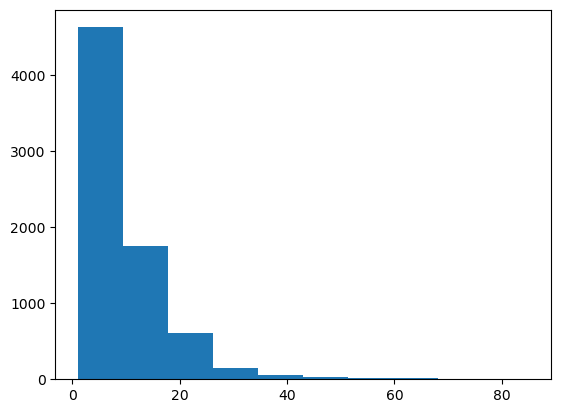

In [127]:
plt.hist(pd.pivot_table(buildings[buildings['firts sort']!=' building'],index='h3_9',values='count',aggfunc=sum))
plt.show()

In [131]:
np.mean(pd.pivot_table(buildings[buildings['firts sort']!=' building'],index='h3_9',values='count',aggfunc=sum))

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


count    8.733242
dtype: float64

buildings.to_csv('buildings.csv',sep=';',encoding='utf-8')

tracks=pd.read_csv('tracks_v3_1.csv',index_col=None,sep=',')

tracks=tracks.iloc[0:100,:]

### Another try

In [ ]:
!pip install folium

In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
import json
import h3
import folium
import osmnx as ox
from shapely import wkt
from folium.plugins import HeatMap
from shapely.geometry import Polygon

In [ ]:
#boundaries of SPb
#https://habr.com/ru/articles/579838/

def visualize_polygons(geometry):
    
    lats, lons = get_lat_lon(geometry)
    
    m = folium.Map(location=[sum(lats)/len(lats), sum(lons)/len(lons)], zoom_start=13, tiles='cartodbpositron')
    
    overlay = gpd.GeoSeries(geometry).to_json()
    folium.GeoJson(overlay, name = 'boundary').add_to(m)
    
    return m

# centrioids of poly
def get_lat_lon(geometry):
        
    lon = geometry.apply(lambda x: x.x if x.type == 'Point' else x.centroid.x)
    lat = geometry.apply(lambda x: x.y if x.type == 'Point' else x.centroid.y)
    return lat, lon
  
# boundaries from OSM
cities = ['Санкт-Петербург']
polygon_krd = ox.geometries_from_place(cities, {'boundary':'administrative'}).reset_index()
polygon_krd = polygon_krd[(polygon_krd['name'] == 'Санкт-Петербург')]

visualize_polygons(polygon_krd['geometry'])

In [ ]:
def create_hexagons(geoJson):
    
    polyline = geoJson['coordinates'][0]

    polyline.append(polyline[0])
    lat = [p[0] for p in polyline]
    lng = [p[1] for p in polyline]
    m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=13, tiles='cartodbpositron')
    my_PolyLine=folium.PolyLine(locations=polyline,weight=8,color="green")
    m.add_child(my_PolyLine)

    hexagons = list(h3.polyfill(geoJson, 8))
    polylines = []
    lat = []
    lng = []
    for hex in hexagons:
        polygons = h3.h3_set_to_multi_polygon([hex], geo_json=False)
        # flatten polygons into loops.
        outlines = [loop for polygon in polygons for loop in polygon]
        polyline = [outline + [outline[0]] for outline in outlines][0]
        lat.extend(map(lambda v:v[0],polyline))
        lng.extend(map(lambda v:v[1],polyline))
        polylines.append(polyline)
    for polyline in polylines:
        my_PolyLine=folium.PolyLine(locations=polyline,weight=3,color='red')
        m.add_child(my_PolyLine)
        
    polylines_x = []
    for j in range(len(polylines)):
        a = np.column_stack((np.array(polylines[j])[:,1],np.array(polylines[j])[:,0])).tolist()
        polylines_x.append([(a[i][0], a[i][1]) for i in range(len(a))])
        
    polygons_hex = pd.Series(polylines_x).apply(lambda x: Polygon(x))
        
    return m, polygons_hex, polylines
# polygon_hex , polylines - geometries of hexes in dif formats

# hexes in poly
geoJson = json.loads(gpd.GeoSeries(polygon_krd['geometry']).to_json())
geoJson = geoJson['features'][0]['geometry']
geoJson = {'type':'Polygon','coordinates': [np.column_stack((np.array(geoJson['coordinates'][0])[:, 1],
                                                      np.array(geoJson['coordinates'][0])[:, 0])).tolist()]}

m, polygons, polylines = create_hexagons(geoJson)
m

In [ ]:
#get attributes from OSM

def osm_query(tag, city):
    gdf = ox.geometries_from_place(city, tag).reset_index()
    gdf['city'] = np.full(len(gdf), city.split(',')[0])
    gdf['object'] = np.full(len(gdf), list(tag.keys())[0])
    gdf['type'] = np.full(len(gdf), tag[list(tag.keys())[0]])
    gdf = gdf[['city', 'object', 'type', 'geometry']]
    print(gdf.shape)
    return gdf
  
 # object categories
tags = [
        {'building' : 'apartments'}, {'building' : 'detached'}, 
        {'building' : 'dormitory'}, {'building' : 'hotel'}, 
        {'building' : 'house'}, {'building' : 'semidetached_house'}, 
        {'building' : 'terrace'},  {'building' : 'commercial'},
        {'building' : 'office'},  {'building' : 'terrace'},  
        {'building' : 'terrace'}, {'building':'retail'}, 
        {'building':'train_station'},
        {'highway' : 'bus_stop'}, {'footway':'crossing'},
        {'amenity':'cafe'}, {'amenity':'fast_food'}, 
        {'amenity':'restaurant'}, {'amenity':'college'}, 
        {'amenity':'language_school'},  {'amenity':'school'},  
        {'amenity':'university'},  {'amenity':'atm'},  
        {'amenity':'bank'},  {'amenity':'clinic'},  
        {'amenity':'hospital'},  {'amenity':'pharmacy'},  
        {'amenity':'theatre'},  {'amenity':'townhall'},  
        {'amenity':'bench'}, 
       ]
cities = ['Санкт-Петербург, Россия']

gdfs = []
for city in cities:
    for tag in tags:
        gdfs.append(osm_query(tag, city))
        
data_poi = pd.concat(gdfs)
data_poi.groupby(['city','object','type'], as_index = False).agg({'geometry':'count'})

# centroids
lat, lon = get_lat_lon(data_poi['geometry'])
data_poi['lat'] = lat
data_poi['lon'] = lon

In [ ]:
data_poi.head(2)

In [ ]:
np.unique(data_poi['object'])

In [ ]:
data_poi['help']=1
pd.pivot_table(data_poi,index='h3_9',columns='type',values='help',aggfunc=sum).reset_index()

In [ ]:
buildings2=pd.merge(tracks_ready,pd.pivot_table(data_poi,index='h3_9',columns='type',values='help',aggfunc=sum).reset_index(),how='left',on='h3_9')
buildings2

In [ ]:
## нам надо заджойнить тот geojson, что у нас уже есть с OSM данными, которые мы выгрузили

### Attempt 3

In [142]:
import geopandas as gpd
import numpy as np
import osmnx as ox
import pandas as pd

# function to retrieve OSM data
def osm_query(tag, city):
    gdf = ox.geometries_from_place(city, tag).reset_index()
    gdf['city'] = np.full(len(gdf), city.split(',')[0])
    gdf['object'] = np.full(len(gdf), list(tag.keys())[0])
    gdf['type'] = np.full(len(gdf), tag[list(tag.keys())[0]])
    gdf = gdf[['city', 'object', 'type', 'geometry']]
    return gdf

# define OSM attributes to retrieve for Saint Petersburg
tags = [
    {'building' : 'apartments'}, {'building' : 'detached'}, 
        {'building' : 'dormitory'}, {'building' : 'hotel'}, 
        {'building' : 'house'}, {'building' : 'semidetached_house'}, 
        {'building' : 'terrace'},  {'building' : 'commercial'},
        {'building' : 'office'},  {'building' : 'terrace'},  
        {'building' : 'terrace'}, {'building':'retail'}, 
        {'building':'train_station'},
        {'highway' : 'bus_stop'}, {'footway':'crossing'},
        {'amenity':'cafe'}, {'amenity':'fast_food'}, 
        {'amenity':'restaurant'}, {'amenity':'college'}, 
        {'amenity':'language_school'},  {'amenity':'school'},  
        {'amenity':'university'},  {'amenity':'atm'},  
        {'amenity':'bank'},  {'amenity':'clinic'},  
        {'amenity':'hospital'},  {'amenity':'pharmacy'},  
        {'amenity':'theatre'},  {'amenity':'townhall'},  
        {'amenity':'bench'}, 
]

cities = ['Санкт-Петербург, Россия']

# retrieve OSM data for each attribute and store in a list
gdfs = []
for city in cities:
    for tag in tags:
        gdfs.append(osm_query(tag, city))

# combine all OSM data into a single GeoDataFrame
data_poi = pd.concat(gdfs)

# OSM data into a GeoDataFrame
gdf_osm = gpd.GeoDataFrame(data_poi, geometry='geometry', crs='epsg:4326')



/tmp/ipykernel_78/3963906367.py:8: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  gdf = ox.geometries_from_place(city, tag).reset_index()
/tmp/ipykernel_78/3963906367.py:8: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  gdf = ox.geometries_from_place(city, tag).reset_index()
/tmp/ipykernel_78/3963906367.py:8: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in t

DriverError: spb.geojson: No such file or directory

In [143]:
# load the existing GeoJSON data
file_path = "__TELE2IPA/spb.geojson"
gdf_existing = gpd.read_file(file_path)

# check the columns in the existing GeoDataFrame
print(gdf_existing.columns)

# spatial join between the existing GeoJSON data and the OSM data
spatial_merged_gdf = gpd.sjoin(gdf_existing, gdf_osm, how="left", op="intersects")

# result into a GeoJSON format
spatial_merged_gdf.to_file("spatial_merged_data.geojson", driver="GeoJSON")


Index(['geometry'], dtype='object')


/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


KeyboardInterrupt: 

In [ ]:
spatial_merged_gdf

## Clustering

#### first - get rid of nans

### Spacial clustering: K-means

In [84]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [85]:
features = ['centroid_lon', 'centroid_lat', 'start_dttm_day', 'age', 'car_owners', 'carsharing_user', 'not_citizen_rf', 'gender', 'healthy_food_inter', 'income', 'public_trnsprt_user']

In [87]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(tracks[features])

In [ ]:
kmeans = KMeans(n_clusters=3) 
kmeans.fit(data_scaled)

In [ ]:
data['cluster'] = kmeans.labels_

In [ ]:
print(data[['id', 'centroid_lon', 'centroid_lat', 'cluster']])

### Temporal clustering: STL or PHON

### Density-based clustering: DBSCAN

In [13]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [14]:
# features
features = ['centroid_lon', 'centroid_lat', 'start_dttm_day', 'age', 'car_owners', 'carsharing_user', 'not_citizen_rf', 'gender', 'healthy_food_inter', 'income', 'public_trnsprt_user']

In [15]:
# standardize
scaler = StandardScaler()
data_scaled = scaler.fit_transform(tracks[features])

In [ ]:
dbscan = DBSCAN(eps=0.3, min_samples=10)  # Adjust eps and min_samples as needed
data['cluster'] = dbscan.fit_predict(data_scaled)

In [ ]:
print(data[['id', 'centroid_lon', 'centroid_lat', 'cluster']])

### Contextual clustering: CHC or CILSA

### Anomaly detection: One-Class SVM or Local Outlier Factor (LOF)

### Dimensionality reduction: PCA

In [17]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [18]:
# features for PCA
features = ['centroid_lon', 'centroid_lat', 'start_dttm_day', 'age', 'car_owners', 'carsharing_user', 'not_citizen_rf', 'gender', 'healthy_food_inter', 'income', 'public_trnsprt_user']

In [19]:
# standardize
scaler = StandardScaler()
data_scaled = scaler.fit_transform(tracks[features])

In [ ]:
pca = PCA(n_components=2)  
principal_components = pca.fit_transform(data_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])

In [ ]:
# combine the components with the original dataset
final_data = pd.concat([principal_df, data['id']])

In [ ]:
print(final_data)